# Inferential process

In [92]:
#importation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv("data/EDA.csv", delimiter=",",index_col=0)

In [23]:
df

,total_rooms,population,households,median_income,median_house_value,ocean_proximity,binned_housing_median_age
0,1853.0,1397.0,417.0,1.4817,72000.0,INLAND,"[0,10]"
1,2032.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,"[0,10]"
2,875.0,931.0,214.0,1.5536,58300.0,INLAND,"[20,30]"
3,622.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,"[30,40]"
4,1922.0,1130.0,372.0,4.0815,117900.0,INLAND,"[20,30]"
...,...,...,...,...,...,...,...
16507,1465.0,745.0,250.0,3.0625,93800.0,INLAND,"[10,20]"
16508,2365.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,"[40,50]"
16509,2531.0,1206.0,429.0,4.4958,192600.0,INLAND,"[10,20]"
16510,2776.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,"[30,40]"


## anova

### shapiro hypothesises:

i will be making tests for ocean_proximity since it's the only qualitative variable

H0 : if p-value > 5%, it is a normal distribution

H1 : if p-value < 5%, it isn't a normal distribution

In [24]:
df1 = df.drop(['median_house_value'],axis=1)

In [25]:
#p value is <5%, so it isn't a normal distribution, the H1 hypothesis is confirmed
shapiro_test = stats.shapiro(df1.select_dtypes(include=[np.number]))
shapiro_test

ShapiroResult(statistic=0.8402063846588135, pvalue=0.0)

### levene test

H0 : if p-value > 5%, the variables have the same variances

H1 : if p-value < 5%, the variables doesn't have the same variances

In [26]:
#looking for homoscédasticity in the values of the variables 
#H1 is confirmed, it is not advisable and usefull to do the anova test with our current data
stats.levene(df['median_house_value'][df['ocean_proximity'] == 'INLAND'],
             df['median_house_value'][df['ocean_proximity'] == '<1H OCEAN'],
             df['median_house_value'][df['ocean_proximity'] == 'NEAR OCEAN'],
             df['median_house_value'][df['ocean_proximity'] == 'NEAR BAY'])

LeveneResult(statistic=346.12073759293173, pvalue=6.928383819008042e-217)

In [80]:
stats.levene(df['median_house_value'][df['binned_housing_median_age'] == '[0,10]'],
             df['median_house_value'][df['binned_housing_median_age'] == '[10,20]'],
             df['median_house_value'][df['binned_housing_median_age'] == '[20,30]'],
             df['median_house_value'][df['binned_housing_median_age'] == '[30,40]'],
             df['median_house_value'][df['binned_housing_median_age'] == '[40,50]'])

LeveneResult(statistic=37.677183544041945, pvalue=2.118941178519392e-31)

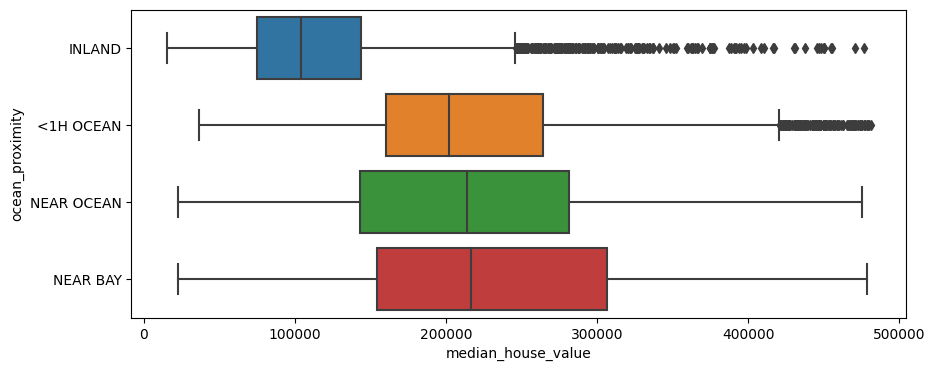

In [15]:
#plotting it
plt.subplots(figsize=(10,4))
ax = sns.boxplot(x="median_house_value", y="ocean_proximity", data=df)

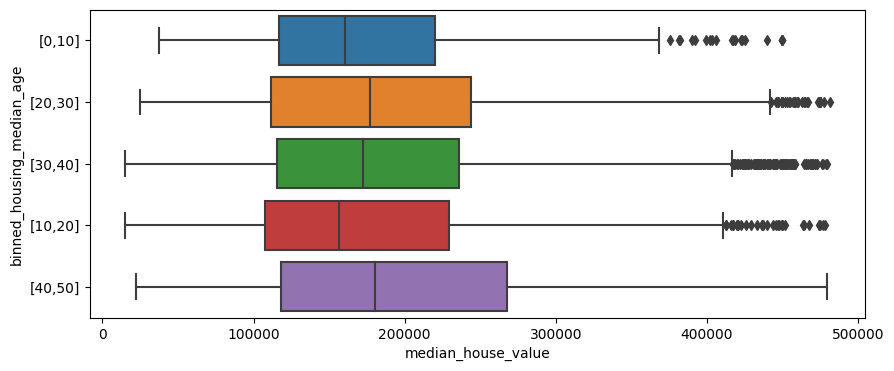

In [81]:
#the variance is not that high
plt.subplots(figsize=(10,4))
ax = sns.boxplot(x="median_house_value", y="binned_housing_median_age", data=df)

## pearson test

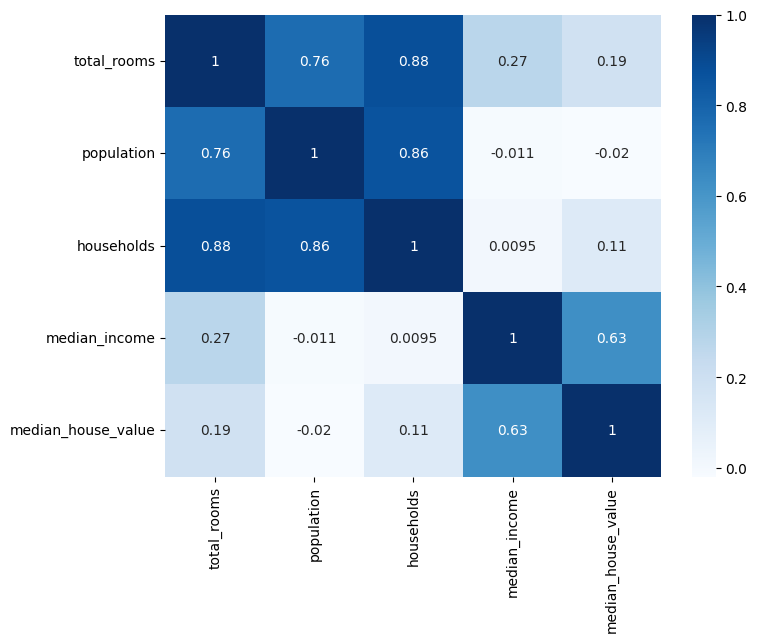

In [83]:
#heatmap of correlations for the pearson test
heat = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heat, annot=True,cmap='Blues')
plt.show()

H0: p-value >5%, the variables are independent

H1: p-value <5%, the variables are dependent

In [87]:
#looking at the highest correlated variable (median_income) with median_house_value
#unfortunately they are highly independant
pearsonr(df.median_house_value, df.median_income)

(0.6271420968191529, 0.0)

## CHI2 test

In [89]:
#doing the contingency table
X = "ocean_proximity"
Y = "binned_housing_median_age"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

binned_housing_median_age,"[0,10]","[10,20]","[20,30]","[30,40]","[40,50]",Total
ocean_proximity,,,,,,
<1H OCEAN,256,1096,1456,2132,1137,6077
INLAND,462,1498,1145,1049,539,4693
NEAR BAY,38,141,204,395,742,1520
NEAR OCEAN,72,357,478,524,370,1801
Total,828,3092,3283,4100,2788,14091


In [93]:
chi2, p, dof, exp = chi2_contingency(cont)

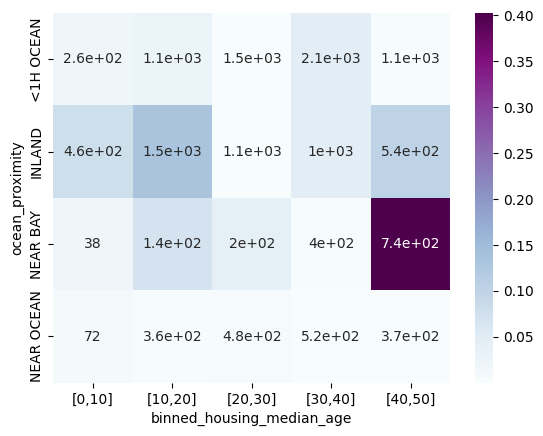

In [95]:
#wtf does that mean
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],cmap=plt.cm.BuPu)
plt.show()